#**Healthcare Data Science Project**

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading file and storing it in 'df' Variable
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Here's the organized list of clinical features:

1. Age :

Explanation: Age of the patient

Measurement: Years

2. Anaemia :

Explanation: Decrease of red blood cells or hemoglobin

Measurement: Boolean

3. Creatinine phosphokinase (CPK):

Explanation: Level of the CPK enzyme in the blood

Measurement: mcg/L

4. Diabetes :

Explanation: If the patient has diabetes

Measurement: Boolean

5. Ejection fraction :

Explanation: Percentage of blood leaving the heart at each contraction

Measurement: Percentage

6. High blood pressure :

Explanation: If the patient has hypertension

Measurement: Boolean

7. Platelets :

Explanation: Platelets in the blood

Measurement: kiloplatelets/mL

8. Sex :

Explanation: Woman or man

Measurement: Binary

9. Serum creatinine :

Explanation: Level of serum creatinine in the blood

Measurement: mg/dL

10. Serum sodium :

Explanation: Level of serum sodium in the blood

Measurement: mEq/L

11. Smoking :

Explanation: If the patient smokes or not

Measurement: Boolean

12. Time :

Explanation: Follow-up period

Measurement: Days

13. [Target] Death event :

Explanation: If the patient died during the follow-up period

Measurement: Boolean

In [ ]:
#Checking Rows and Columns
df.shape

(299, 13)

In [ ]:
#Checking Null Values and Datatypes of Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Statistical Summary
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#Checking Duplicates
#0 Duplicates

df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking Value Counts
def counts(data):
  cols=data.columns
  for i in cols:
    print(data[i].value_counts())

counts(df)

age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
68.000     5
62.000     5
52.000     5
61.000     4
49.000     4
73.000     4
51.000     4
59.000     4
69.000     3
46.000     3
82.000     3
90.000     3
64.000     3
48.000     2
78.000     2
95.000     2
57.000     2
54.000     2
77.000     2
67.000     2
66.000     2
44.000     2
60.667     2
87.000     1
79.000     1
41.000     1
94.000     1
86.000     1
81.000     1
43.000     1
47.000     1
56.000     1
Name: count, dtype: int64
anaemia
0    170
1    129
Name: count, dtype: int64
creatinine_phosphokinase
582     47
129      4
66       4
47       3
60       3
        ..
190      1
103      1
1820     1
2060     1
2413     1
Name: count, Length: 208, dtype: int64
diabetes
0    174
1    125
Name: count, dtype: int64
ejection_fraction
35    49
38    40
40    37
25    36
30    34
60    

#**Visualization**

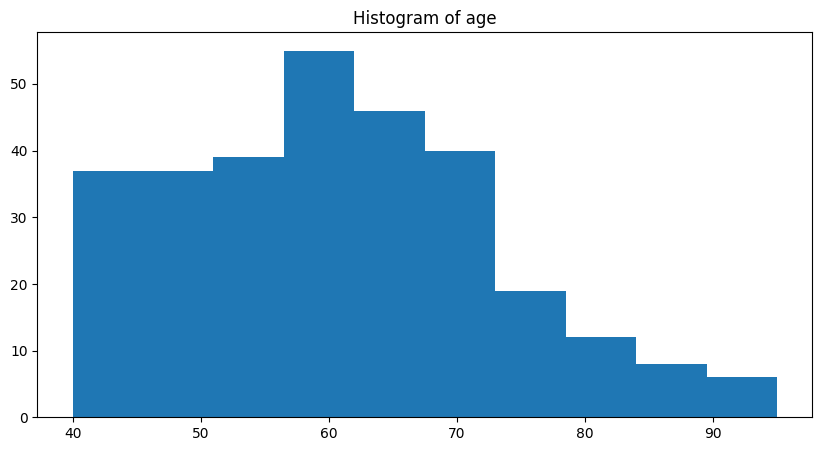

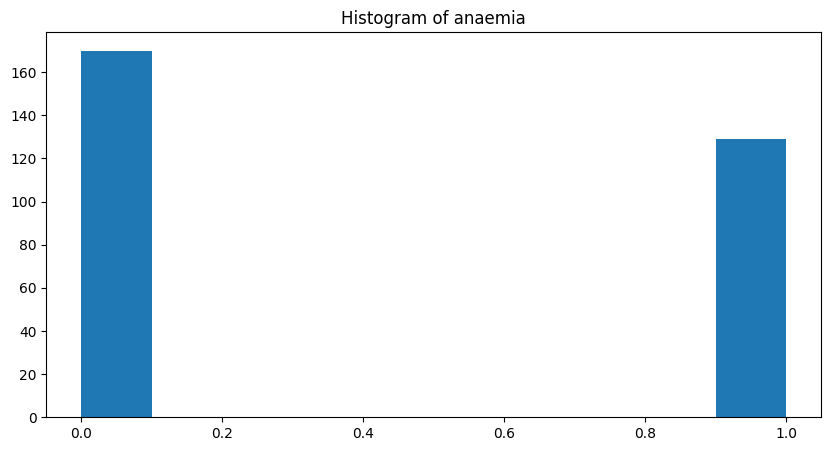

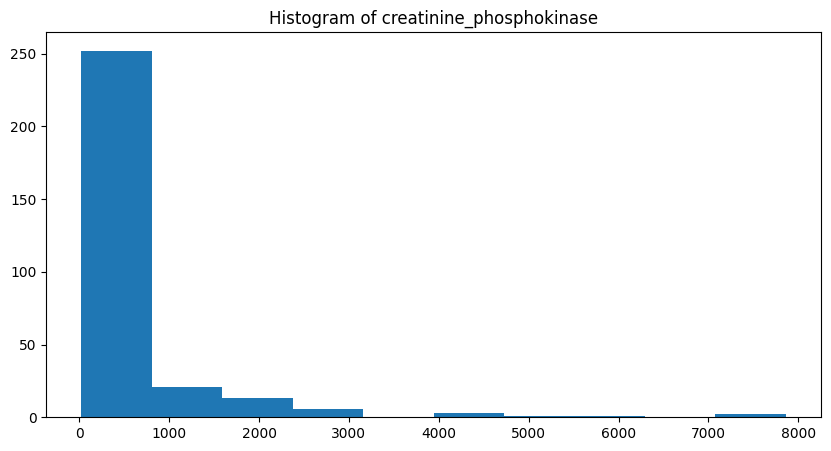

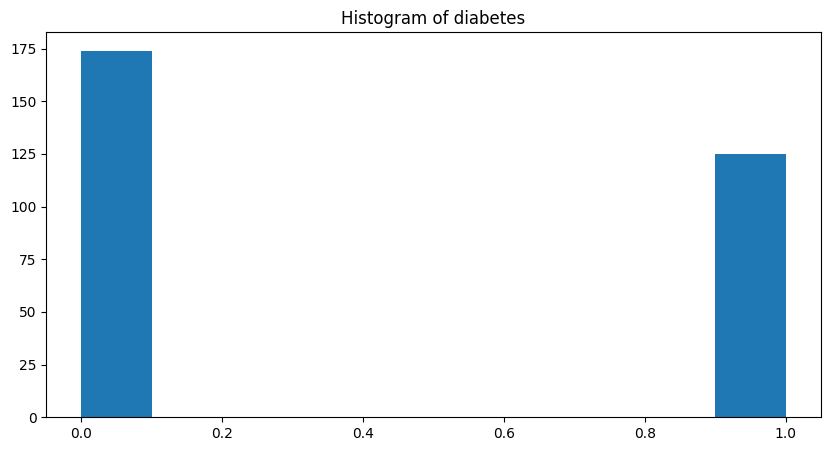

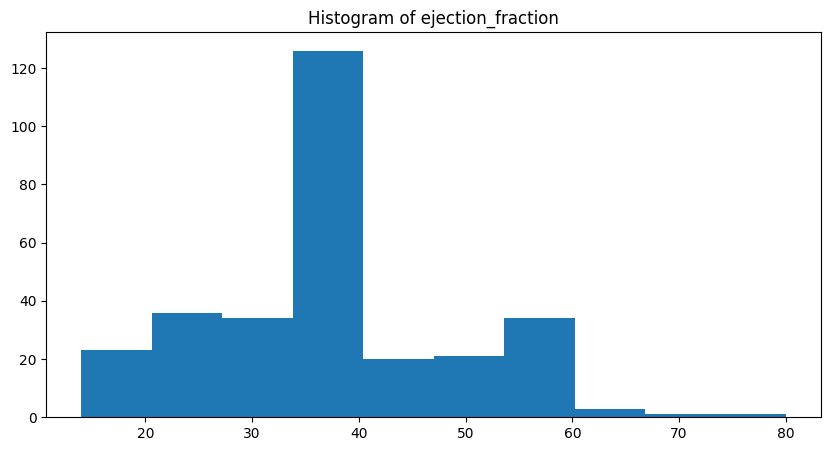

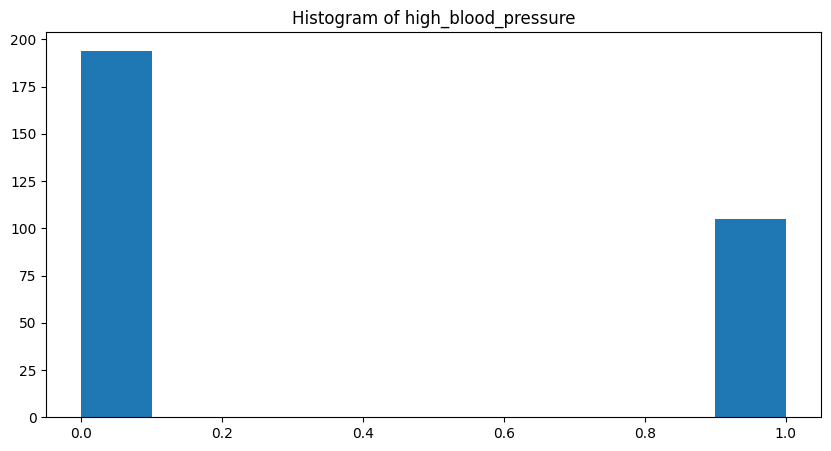

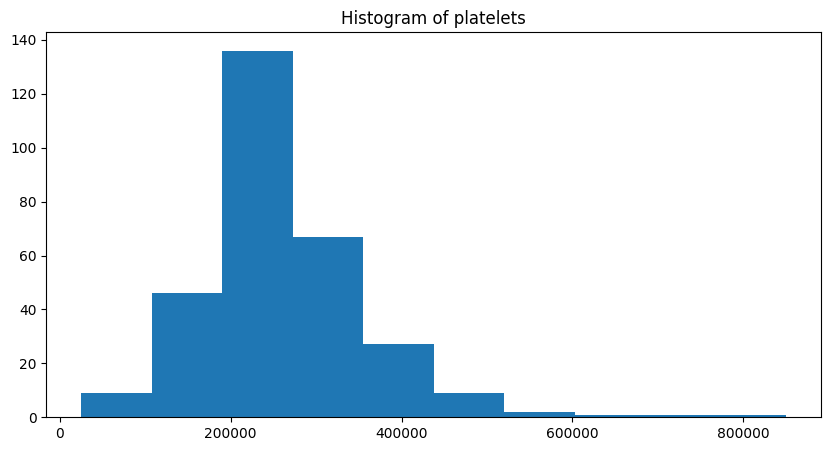

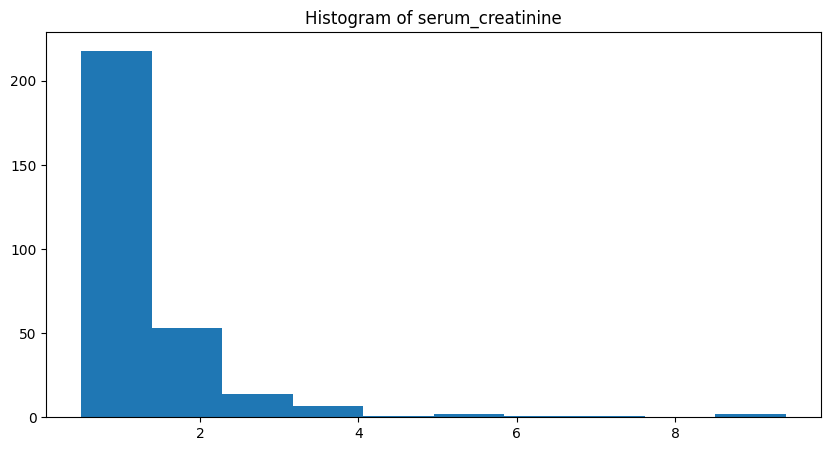

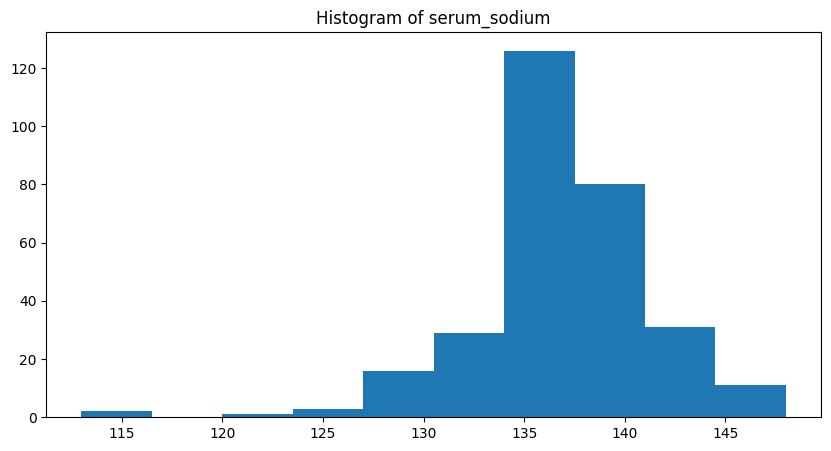

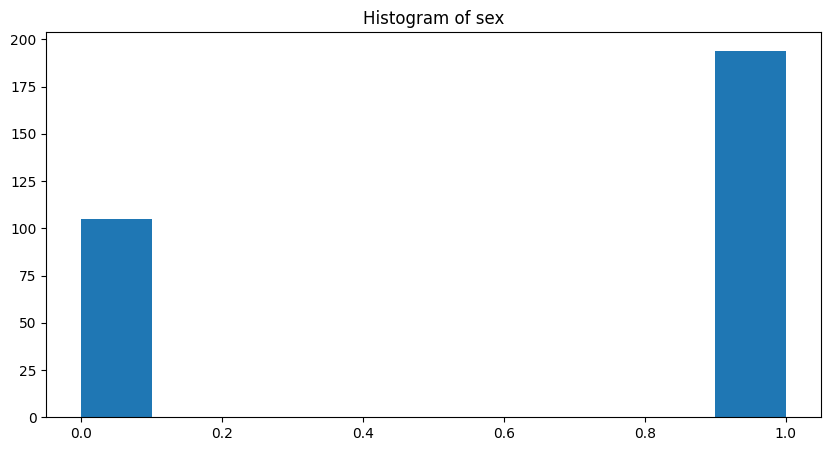

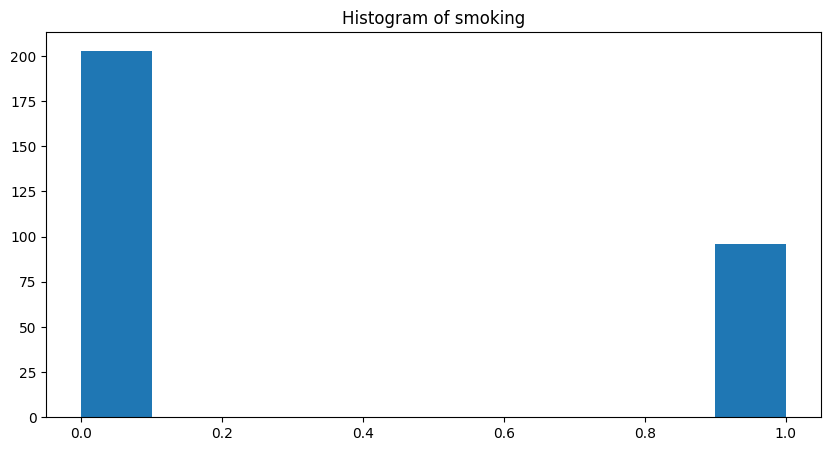

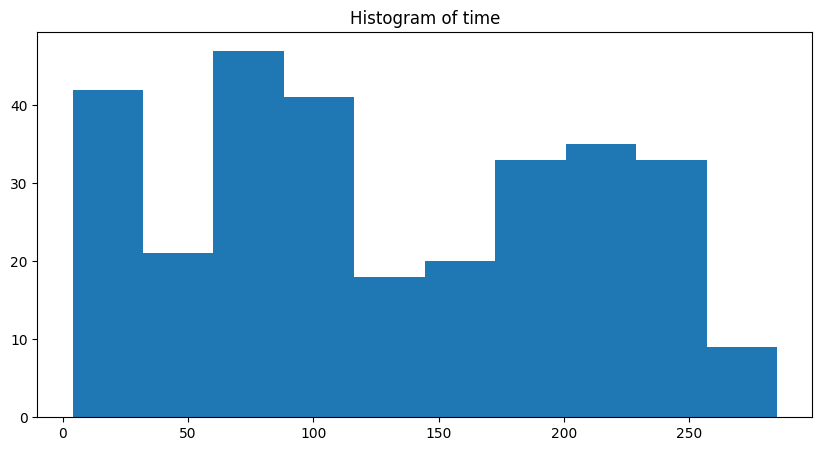

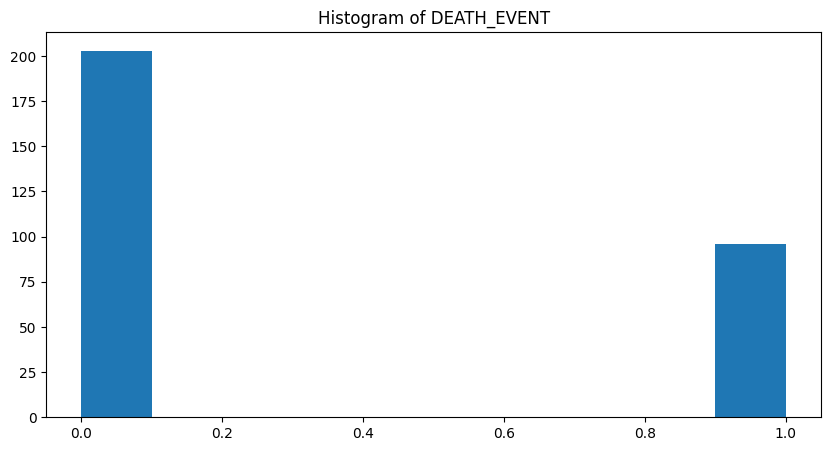

In [ ]:
#Histogram for all columns
def hist(data):
  cols=data.columns
  for i in cols:
    plt.figure(figsize=(10,5))
    plt.hist(data[i])
    plt.title(f'Histogram of {i}')
    plt.show()

hist(df)

In [ ]:
#Checking Correralion
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

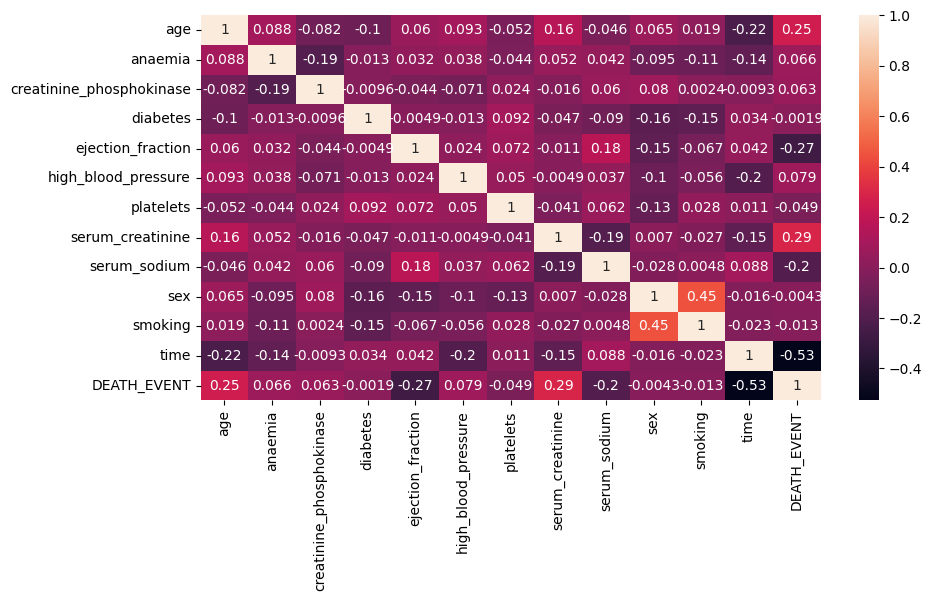

In [ ]:
#Visualizing Correlated values

plt.figure(figsize=(10 , 5))
sns.heatmap(df.corr() , annot = True)

<Axes: >

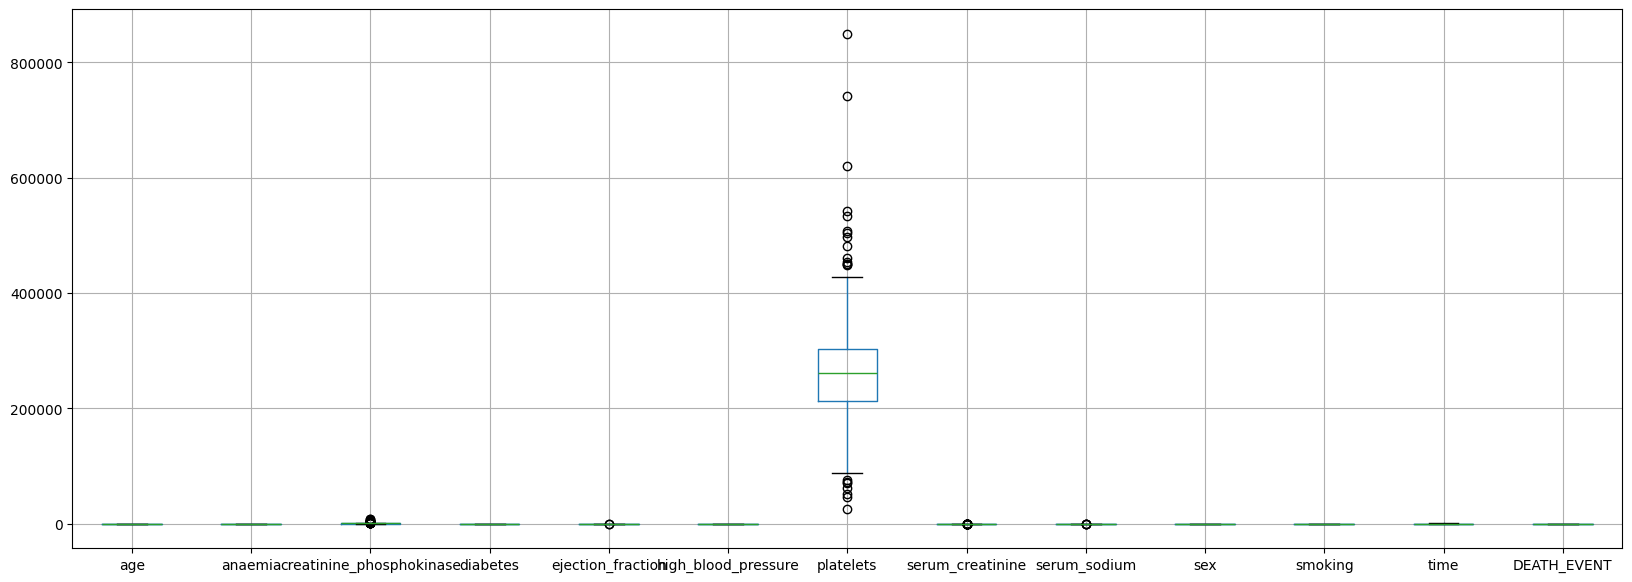

In [ ]:
#Boxplot

plt.figure(figsize=(20,7))
df.boxplot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
x=df.iloc[: , 0:12]
y=df.iloc[: , 12]

In [ ]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


#**Feature Selection Method**

In [ ]:
#1. Filter Method

from sklearn.feature_selection import SelectKBest , chi2

select=SelectKBest(score_func=chi2 , k=10)
k=select.fit(x,y)
print(k.scores_)

scores=pd.DataFrame({"columns" : x.columns ,
                     "scores" : k.scores_})
scores.sort_values(by='scores' , ascending=False)

[4.46194546e+01 7.46593411e-01 1.89731484e+03 6.56814450e-04
 7.90725412e+01 1.22153853e+00 2.61357720e+04 1.98141177e+01
 1.61817451e+00 1.95626598e-03 3.23468288e-02 3.82689266e+03]


,columns,scores
6,platelets,26135.771990
11,time,3826.892661
2,creatinine_phosphokinase,1897.314839
4,ejection_fraction,79.072541
0,age,44.619455
7,serum_creatinine,19.814118
8,serum_sodium,1.618175
5,high_blood_pressure,1.221539
1,anaemia,0.746593
10,smoking,0.032347


In [ ]:
#2. Wrapper Method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

mod=LogisticRegression()
ref=RFE(estimator=mod , n_features_to_select = 10)
ref.fit(x,y)

scores=pd.DataFrame({"columns" : x.columns ,
                     "support" : ref.support_ ,
                     'Ranking' : ref.ranking_})
scores.sort_values(by='support' , ascending=False)

,columns,support,Ranking
0,age,True,1
1,anaemia,True,1
3,diabetes,True,1
4,ejection_fraction,True,1
5,high_blood_pressure,True,1
7,serum_creatinine,True,1
8,serum_sodium,True,1
9,sex,True,1
10,smoking,True,1
11,time,True,1


In [ ]:
#3. Embedded
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7 , min_samples_leaf=4 , min_samples_split=3 , class_weight='balanced')
dt.fit(x,y)

scores=pd.DataFrame({"columns" : x.columns ,
                     "scores" : dt.feature_importances_})
scores.sort_values(by='scores' , ascending=False)

,columns,scores
11,time,0.549498
7,serum_creatinine,0.145211
4,ejection_fraction,0.105269
0,age,0.059309
2,creatinine_phosphokinase,0.049430
6,platelets,0.033734
3,diabetes,0.031498
8,serum_sodium,0.022487
9,sex,0.003566
1,anaemia,0.000000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [ ]:
#Based on three Feature Selection methods I decided to keep 'age' , 'creatinine_phosphokinase' , 'ejection_fraction' , 'high_blood_pressure' ,
#                                                           'platelets' , 'serum_creatinine' , 'serum_sodium' , 'sex' , 'time'

In [ ]:
#Keeping only Important Columns

x1=x.iloc[: , [0 , 2 , 4 , 5 , 6 , 7 , 8 , 9 , 11]]

In [ ]:
x1

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time
0,75.0,582,20,1,265000.00,1.9,130,1,4
1,55.0,7861,38,0,263358.03,1.1,136,1,6
2,65.0,146,20,0,162000.00,1.3,129,1,7
3,50.0,111,20,0,210000.00,1.9,137,1,7
4,65.0,160,20,0,327000.00,2.7,116,0,8
...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,1,155000.00,1.1,143,1,270
295,55.0,1820,38,0,270000.00,1.2,139,0,271
296,45.0,2060,60,0,742000.00,0.8,138,0,278
297,45.0,2413,38,0,140000.00,1.4,140,1,280


#**Preprocessing**

Doing Robust scaler on 'ejection_fraction' as it has outliers and not skewed


Doing log transformation on  
    'creatinine_phosphokinase',
    'serum_creatinine',
    'platelets'



Scaling this features
    'age',
    'serum_sodium',
    'time'



In [ ]:
from sklearn.preprocessing import RobustScaler , FunctionTransformer , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold , cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [ ]:
log_cols=[
    'creatinine_phosphokinase',
    'serum_creatinine',
    'platelets'
]

In [ ]:
scale_cols =[
    'age',
    'serum_sodium',
    'time'
]

In [ ]:
rob_scale_cols =[
                 'ejection_fraction' ,
                ]

In [ ]:
binary_cols =[
    'high_blood_pressure' ,
    'sex'
]

In [ ]:
#Making Pipeline
#1.Do the preprocessing like Log Transformation , Scaling
#2. Doing SMOTE to balance the imbalance
#3.Fitting a Model

log_transformer=Pipeline(steps = [
    ('log' , FunctionTransformer(np.log1p)),
    ('scale' , RobustScaler())
])


scaler_transformer=Pipeline(steps=[
    ('scale' , StandardScaler())
])

robust_transformer=Pipeline(steps=[
    ('robust' , RobustScaler())
])
preprocessing=ColumnTransformer(
    transformers=[
        ('log_cols' , log_transformer , log_cols),
        ('scale_cols' , scaler_transformer , scale_cols),
        ('rob_scale_cols' , robust_transformer , rob_scale_cols),
        ('binary_cols' , 'passthrough' , binary_cols)
    ]
)

pipeline=imbpipeline(steps=[
    ('preprocess' , preprocessing),
    ('smote' , SMOTE(random_state=42)),
    ('model' , LogisticRegression(max_iter=100))
])

In [ ]:
#Using StratifiedKFold Cross Validation cause our Target Variable has imabalance

skf=StratifiedKFold(n_splits=6 , shuffle = True , random_state=42)

cross=cross_val_score(pipeline , x1 , y , cv=skf , scoring ='recall')
print(cross.mean())

0.7916666666666666


#**Checking Recall for Different Models**

In [ ]:
#Importing Different Models

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Defining a function for different Model pipeline

def make_pipeline(model):
  return(imbpipeline(
      steps=[
    ('preprocess' , preprocessing),
    ('smote' , SMOTE(random_state=42)),
    ('model' , model)
      ]
  ))

In [ ]:
#Storing Pipeline of Different Models

xgb_pip=make_pipeline(XGBClassifier(n_estimators=100 , max_depth =6 , learning_rate=0.001 , colsample_bytree=0.6 , subsample=0.8 , scale_pos_weight=1))
lgb_pip=make_pipeline(LGBMClassifier(n_estimators=100 , max_depth =6 , learning_rate=0.001 , colsample_bytree=0.6 , subsample=0.8 , num_leaves=4 , class_weight='balanced' , verbose=-1))
svc_pip=make_pipeline(SVC(kernel='rbf' , C=0.001))
knn_pip=make_pipeline(KNeighborsClassifier(metric='euclidean' , n_neighbors=11))
dt_pip=make_pipeline(DecisionTreeClassifier(max_depth=6 , min_samples_leaf=6 , min_samples_split=7))

In [ ]:
#Checking Recall and Accuracy for all the Models

pip ={ "XGBoost" : xgb_pip ,
       "LGBM" : lgb_pip ,
        "SVC" : svc_pip ,
        "KNN" : knn_pip ,
        "DecisionTree" : dt_pip}

#for recall
print("FOR RECALL :")
for name , model in pip.items():
  scores=cross_val_score(model , x1 , y , cv = skf , scoring='recall')
  print(f'For {name} : Recall is {scores.mean()}')

#for accuracy
print("FOR ACCURACY :")
for name , model in pip.items():
  scores=cross_val_score(model , x1 , y , cv = skf , scoring='accuracy')
  print(f'For {name} : Accuracy is {scores.mean()}')

FOR RECALL :
For XGBoost : Recall is 0.75
For LGBM : Recall is 0.8020833333333334
For SVC : Recall is 0.8125
For KNN : Recall is 0.6979166666666666
For DecisionTree : Recall is 0.6875
FOR ACCURACY :
For XGBoost : Accuracy is 0.8191836734693877
For LGBM : Accuracy is 0.799251700680272
For SVC : Accuracy is 0.8161904761904761
For KNN : Accuracy is 0.7258503401360544
For DecisionTree : Accuracy is 0.7558503401360545


In [1]:
#Here SVC and LGBM giving high Recall and Accuracy
#So Selecting that models

#**Finding Best Paramaters for SVC and LGBM**

##**For SVC**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Finding the best Paramaters for SVC so the model perform well

Param_grid_svc={
    'model__kernel': ['rbf'],
    'model__C': [0.1, 1, 10],
    'model__gamma': ['scale', 0.01, 0.1]
}

svc_grid=GridSearchCV(svc_pip , param_grid=Param_grid_svc , scoring='recall' , cv=skf , n_jobs=-1)
svc_grid.fit(x1,y)
print('Best Recall :' , svc_grid.best_score_)
print('Best Params :' , svc_grid.best_params_)

Best Recall : 0.84375
Best Params : {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


##**For LGBM**

In [ ]:
#Finding Best Paramaters for LGBM model

Param_grid_lgb={
    'model__n_estimators': [50 , 100],
    'model__max_depth': [3, 5, -1],
    'model__learning_rate': [0.01, 0.05],
    'model__num_leaves': [15, 31]
}



lgb_grid=GridSearchCV(lgb_pip , param_grid=Param_grid_lgb , scoring='recall' , cv=skf , n_jobs=-1)
lgb_grid.fit(x1,y)
print('Best Recall :' , lgb_grid.best_score_)
print('Best Params :' , lgb_grid.best_params_)

Best Recall : 0.8125
Best Params : {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__num_leaves': 15}


#**Finalising the Model and Storing**

In [ ]:
#By Comparing the Results , I decided to keep SVC as its giving High recall and High accuracy

from sklearn.metrics import classification_report , confusion_matrix

y_pred=svc_grid.best_estimator_.predict(x1)
classi=classification_report(y,y_pred)
confu = confusion_matrix(y,y_pred)

In [ ]:
print(classi)
print(confu)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       203
           1       0.69      0.89      0.78        96

    accuracy                           0.84       299
   macro avg       0.81      0.85      0.82       299
weighted avg       0.86      0.84      0.84       299

[[165  38]
 [ 11  85]]


In [ ]:
#Saving Model with Best Params

import joblib
joblib.dump(svc_grid.best_estimator_ , 'final_svc_model.pkl')

['final_svc_model.pkl']

#**Deployement**

In [ ]:
#Installing Streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.0 MB/s eta 0:00:00


In [ ]:
#Installing pyngrok
!pip install pyngrok

In [ ]:
!pip install streamlit pyngrok joblib

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
#Writing app.py

%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# ================= PAGE CONFIGURATION =================
st.set_page_config(
    page_title="Heart Failure Prediction",
    page_icon="❤️",
    layout="wide",
    initial_sidebar_state="expanded"
)

# ================= FIXED CSS - CLEAR VISIBLE OUTPUT =================
st.markdown("""
<style>
    /* ENLARGED MAIN TITLE - EVEN BIGGER */
    .main-header {
        font-size: 3.8rem;  /* Increased from 3.2rem */
        color: #ff4b4b;
        text-align: center;
        margin-bottom: 0.5rem;
        font-weight: 800;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1);
        padding: 0.5rem;
        background: linear-gradient(135deg, #fff5f5 0%, #ffe6e6 100%);
        border-radius: 15px;
        border: 3px solid #ff4b4b;
        padding: 1.5rem;
        margin-top: 0.5rem;
        margin-bottom: 1rem;
    }
    .subheader {
        font-size: 1.4rem;  /* Slightly larger */
        color: #666;
        text-align: center;
        margin-bottom: 2.5rem;
        font-weight: 400;
        padding-bottom: 1rem;
    }
    .stButton > button {
        width: 100%;
        background: linear-gradient(135deg, #ff4b4b 0%, #e04343 100%);
        color: white;
        font-weight: bold;
        padding: 1rem;
        border-radius: 12px;
        border: none;
        transition: all 0.3s ease;
        font-size: 1.1rem;
    }
    .stButton > button:hover {
        transform: translateY(-3px);
        box-shadow: 0 6px 20px rgba(255, 75, 75, 0.4);
    }
    /* FIXED: Prediction boxes with clear visibility */
    .prediction-box {
        padding: 2.5rem;
        border-radius: 15px;
        margin: 2rem 0;
        text-align: center;
        font-size: 2rem;  /* Slightly larger */
        font-weight: bold;
        box-shadow: 0 6px 25px rgba(0, 0, 0, 0.15);
    }
    .high-risk {
        background: linear-gradient(135deg, #ffe6e6 0%, #ffcccc 100%);
        border: 3px solid #ff4b4b;
        color: #cc0000;
        animation: pulse 2s infinite;
    }
    .low-risk {
        background: linear-gradient(135deg, #e6ffe6 0%, #ccffcc 100%);
        border: 3px solid #4CAF50;
        color: #006600;
    }
    @keyframes pulse {
        0% { box-shadow: 0 0 0 0 rgba(255, 75, 75, 0.4); }
        70% { box-shadow: 0 0 0 20px rgba(255, 75, 75, 0); }
        100% { box-shadow: 0 0 0 0 rgba(255, 75, 75, 0); }
    }
    .feature-description {
        font-size: 0.9rem;
        color: #777;
        font-style: italic;
        margin-top: -8px;
        margin-bottom: 20px;
        padding-left: 0.5rem;
    }
    /* WHITE SECTION HEADERS */
    .section-header {
        font-size: 1.8rem;  /* Slightly larger */
        color: white;  /* WHITE TEXT */
        background: linear-gradient(135deg, #ff4b4b 0%, #e04343 100%);  /* Red gradient background */
        margin-bottom: 1.5rem;
        padding: 15px 20px;
        border-radius: 12px;
        text-align: left;
        font-weight: 600;
        display: flex;
        align-items: center;
        gap: 12px;
        box-shadow: 0 4px 12px rgba(255, 75, 75, 0.2);
    }
    .section-header::before {
        content: "👤";
        font-size: 1.6rem;
    }
    .measurement-header {
        font-size: 1.8rem;  /* Slightly larger */
        color: white;  /* WHITE TEXT */
        background: linear-gradient(135deg, #4CAF50 0%, #45a049 100%);  /* Green gradient background */
        margin-bottom: 1.5rem;
        padding: 15px 20px;
        border-radius: 12px;
        text-align: left;
        font-weight: 600;
        display: flex;
        align-items: center;
        gap: 12px;
        box-shadow: 0 4px 12px rgba(76, 175, 80, 0.2);
    }
    .measurement-header::before {
        content: "📊";
        font-size: 1.6rem;
    }
    /* Input field styling */
    .stNumberInput, .stSlider {
        margin-bottom: 1.2rem;
    }
    .stNumberInput > div > div > input {
        border-radius: 8px;
        border: 1px solid #ddd;
        padding: 10px;
    }
    /* Sidebar improvements */
    .sidebar-title {
        font-size: 1.4rem;
        color: #ff4b4b;
        margin-bottom: 1rem;
    }
    /* Additional styling for better spacing */
    .column-container {
        background: #f9f9f9;
        padding: 20px;
        border-radius: 15px;
        border: 1px solid #eee;
        box-shadow: 0 2px 10px rgba(0,0,0,0.05);
    }
</style>
""", unsafe_allow_html=True)

# ================= LOAD MODEL =================
@st.cache_resource
def load_model():
    return joblib.load("final_svc_model.pkl")

model = load_model()

# ================= SIDEBAR =================
with st.sidebar:
    st.markdown('<p class="sidebar-title">❤️ About This Project</p>', unsafe_allow_html=True)
    st.markdown("""
    ### Heart Failure Survival Prediction

    This application predicts the survival probability of patients with heart failure using machine learning.

    **Model Details:**
    - Algorithm: Support Vector Classifier (SVC)
    - Features: 9 clinical parameters
    - Accuracy: 84%

    **Clinical Parameters Used:**
    1. Age
    2. Creatinine Phosphokinase (CPK)
    3. Ejection Fraction
    4. High Blood Pressure
    5. Platelets
    6. Serum Creatinine
    7. Serum Sodium
    8. Sex
    9. Follow-up Time

    **Disclaimer:**
    This tool is for **educational purposes only**. Always consult healthcare professionals for medical decisions.
    """)

    st.markdown("---")
    st.markdown("### 📊 Data Source")
    st.markdown("Dataset from: [Kaggle](https://www.kaggle.com/datasets/guriya79/heart-failure-prediction-dataset)")

    st.markdown("---")
    st.markdown("### 👨‍⚕️ Clinical Notes")
    st.markdown("""
    **Normal Ranges:**
    - CPK: 20-200 U/L
    - Ejection Fraction: 50-70%
    - Platelets: 150,000-450,000/μL
    - Serum Sodium: 135-145 mEq/L
    - Serum Creatinine: 0.6-1.2 mg/dL
    """)

# ================= MAIN CONTENT =================
# Header with LARGEST TITLE
st.markdown('<p class="main-header">❤️ Heart Failure Survival Prediction</p>', unsafe_allow_html=True)
st.markdown('<p class="subheader">Predict survival probability based on clinical parameters</p>', unsafe_allow_html=True)

# Create two columns for inputs
col1, col2 = st.columns(2)

with col1:
    st.markdown('<div class="section-header">Patient Demographics</div>', unsafe_allow_html=True)

    # Add a container for better visual separation
    with st.container():
        age = st.slider("Age (years)", min_value=30, max_value=100, value=60)
        st.markdown('<p class="feature-description">Patient\'s age in years</p>', unsafe_allow_html=True)

        sex = st.radio("Sex", options=["Female", "Male"], horizontal=True, index=0)
        sex = 1 if sex == "Male" else 0

        high_blood_pressure = st.radio("High Blood Pressure", options=["No", "Yes"], horizontal=True, index=0)
        high_blood_pressure = 1 if high_blood_pressure == "Yes" else 0

        time = st.number_input("Follow-up Time (days)", min_value=1, value=30)
        st.markdown('<p class="feature-description">Observation period in days</p>', unsafe_allow_html=True)

with col2:
    st.markdown('<div class="measurement-header">Clinical Measurements</div>', unsafe_allow_html=True)

    # Add a container for better visual separation
    with st.container():
        creatinine_phosphokinase = st.number_input(
            "Creatinine Phosphokinase (CPK) U/L",
            min_value=20,
            value=250,
            help="Normal range: 20-200 U/L"
        )

        ejection_fraction = st.slider(
            "Ejection Fraction (%)",
            min_value=10,
            max_value=80,
            value=40,
            help="Normal range: 50-70%"
        )

        platelets = st.number_input(
            "Platelets (cells/μL)",
            min_value=50000,
            value=250000,
            help="Normal range: 150,000-450,000/μL"
        )

        serum_creatinine = st.number_input(
            "Serum Creatinine (mg/dL)",
            min_value=0.1,
            value=1.0,
            step=0.1,
            help="Normal range: 0.6-1.2 mg/dL"
        )

        serum_sodium = st.number_input(
            "Serum Sodium (mEq/L)",
            min_value=100,
            max_value=150,
            value=135,
            help="Normal range: 135-145 mEq/L"
        )

st.markdown("---")

# ================= PREDICTION SECTION =================
st.markdown("### 🎯 Risk Assessment")

if st.button("🔍 Predict Survival Risk", use_container_width=True):
    # Create input dataframe
    input_df = pd.DataFrame({
        "age": [age],
        "creatinine_phosphokinase": [creatinine_phosphokinase],
        "ejection_fraction": [ejection_fraction],
        "high_blood_pressure": [high_blood_pressure],
        "platelets": [platelets],
        "serum_creatinine": [serum_creatinine],
        "serum_sodium": [serum_sodium],
        "sex": [sex],
        "time": [time]
    })

    # Get prediction
    prediction = model.predict(input_df)[0]

    # Display result with FIXED visible background
    if prediction == 1:
        st.markdown('<div class="prediction-box high-risk">⚠️ HIGH RISK OF HEART FAILURE</div>', unsafe_allow_html=True)

        # Additional warning metrics
        with st.expander("📋 Critical Parameters Detected", expanded=True):
            col_warn1, col_warn2, col_warn3 = st.columns(3)
            with col_warn1:
                st.metric("Ejection Fraction", f"{ejection_fraction}%", delta="Below Normal" if ejection_fraction < 50 else "Normal")
            with col_warn2:
                st.metric("Serum Creatinine", f"{serum_creatinine} mg/dL", delta="Elevated" if serum_creatinine > 1.2 else "Normal")
            with col_warn3:
                st.metric("Age Risk", f"{age} years", delta="High Risk" if age > 65 else "Moderate Risk")

        with st.expander("🚨 Immediate Recommendations"):
            st.markdown("""
            ### **Urgent Actions Required:**

            1. **Immediate Consultation:** Schedule appointment with cardiologist within 24-48 hours
            2. **Emergency Signs to Watch:**
               - Chest pain or pressure
               - Severe shortness of breath
               - Rapid weight gain (>2 kg in 24h)
               - Extreme fatigue or fainting

            3. **Immediate Lifestyle Changes:**
               - Sodium restriction: <1500 mg/day
               - Fluid restriction: <1.5 L/day
               - Daily weight monitoring
               - Limit physical exertion

            4. **Medication Review:**
               - Verify current medications
               - Ensure adherence to prescribed regimen
               - Report any side effects immediately
            """)

    else:
        st.markdown('<div class="prediction-box low-risk">✅ LOW RISK OF HEART FAILURE</div>', unsafe_allow_html=True)

        # Health metrics
        with st.expander("📊 Current Health Status", expanded=True):
            col_health1, col_health2, col_health3 = st.columns(3)
            with col_health1:
                st.metric("Ejection Fraction", f"{ejection_fraction}%", delta="Normal" if ejection_fraction >= 50 else "Monitor")
            with col_health2:
                st.metric("Blood Pressure", "Normal" if high_blood_pressure == 0 else "Elevated")
            with col_health3:
                st.metric("Overall Risk", "Low", delta="Good")

        with st.expander("💡 Preventive Care & Monitoring"):
            st.markdown("""
            ### **Maintain Heart Health:**

            1. **Regular Monitoring:**
               - Blood pressure: Weekly
               - Weight: Daily
               - Symptoms: Keep diary

            2. **Healthy Lifestyle:**
               - Exercise: 150 min moderate/week
               - Diet: DASH or Mediterranean diet
               - Smoking: Complete cessation
               - Alcohol: Moderate (≤1 drink/day)

            3. **Follow-up Schedule:**
               - Cardiologist: Annual check-up
               - Blood tests: Every 6 months
               - Echocardiogram: As recommended

            4. **Early Warning Signs:**
               - New or worsening shortness of breath
               - Swelling in feet/ankles
               - Reduced exercise tolerance
               - Waking up breathless at night
            """)

    # Show input summary
    with st.expander("📈 Input Summary & Analysis"):
        col_sum1, col_sum2 = st.columns(2)

        with col_sum1:
            st.markdown("#### Input Values:")
            st.dataframe(input_df.T.rename(columns={0: "Value"}), use_container_width=True)

        with col_sum2:
            st.markdown("#### Clinical Interpretation:")
            interpretations = []
            if age > 65:
                interpretations.append("Age: Increased cardiovascular risk")
            if ejection_fraction < 40:
                interpretations.append("EF: Significantly reduced heart function")
            elif ejection_fraction < 50:
                interpretations.append("EF: Mildly reduced heart function")
            if serum_creatinine > 1.2:
                interpretations.append("Creatinine: Possible kidney involvement")
            if high_blood_pressure == 1:
                interpretations.append("Hypertension: Major risk factor")

            if interpretations:
                for item in interpretations:
                    st.markdown(f"- {item}")
            else:
                st.markdown("- All parameters within normal ranges")

# ================= FOOTER =================
st.markdown("---")
col1, col2, col3 = st.columns(3)
with col2:
    st.markdown("""
    <div style="text-align: center; color: #777; font-size: 0.9rem; padding: 1rem;">
        <p style="font-size: 1.1rem; margin-bottom: 0.5rem;">❤️ Developed for Healthcare Analytics</p>
        <p>Version 1.0 | For educational and research purposes only</p>
        <p style="margin-top: 0.5rem; font-size: 0.8rem; color: #999;">Model Accuracy: 84% | SVC Algorithm</p>
    </div>
    """, unsafe_allow_html=True)

Overwriting app.py


In [ ]:
#Generating link of Depoyement App

from pyngrok import ngrok
import time

ngrok.set_auth_token("2w35HE4MtGh0C1g5rpB5j42fBLP_Vp1VJUtuWboT7biN32Dg")

# Optional cleanup
ngrok.kill()
time.sleep(2)

public_url = ngrok.connect(8501)
print("🚀 Streamlit app is live at:")
print(public_url)



🚀 Streamlit app is live at:
NgrokTunnel: "https://c5200fd95a5d.ngrok-free.app" -> "http://localhost:8501"
